In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
# Load dataset (replace 'your_dataset.csv' with actual file name)
df = pd.read_csv('AAPL.csv')

In [5]:
# Display first few rows
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099319  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094137  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087228  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089387   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091978   73449600


In [7]:
# Ensure the dataset has a 'Date' and 'Close' column
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [9]:
# Selecting only the closing prices
data = df[['Close']].values

In [11]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [13]:
# Define a function to create sequences of past data for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [15]:
# Set sequence length
SEQ_LENGTH = 60  # Use last 60 days to predict the next day

In [17]:
# Prepare training and testing data
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

In [19]:
X_train, y_train = create_sequences(train_data, SEQ_LENGTH)
X_test, y_test = create_sequences(test_data, SEQ_LENGTH)

In [21]:
# Reshape for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [23]:
from tensorflow.keras import Input

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

model = Sequential([
    Input(shape=(SEQ_LENGTH, 1)),  # Explicit input layer
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)  # Output layer
])

In [27]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - loss: 2.2364e-04 - val_loss: 5.6786e-04
Epoch 2/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - loss: 1.6412e-05 - val_loss: 6.1602e-04
Epoch 3/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - loss: 1.6547e-05 - val_loss: 7.9838e-04
Epoch 4/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - loss: 1.4651e-05 - val_loss: 4.4288e-04
Epoch 5/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 1.4660e-05 - val_loss: 0.0018
Epoch 6/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - loss: 1.6518e-05 - val_loss: 0.0023
Epoch 7/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - loss: 1.6057e-05 - val_loss: 8.1818e-04
Epoch 8/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - loss: 1.1458e-05 - val_loss: 3.9305e-04
Epoch 9/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - loss: 1.5119e-05 - val_loss: 3.1150e-04
Epoch 10/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - loss: 1.3179e-05 - val_loss: 7.7540e-04
Epoch 11/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 12s 45

In [31]:
# Predict on test data
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)  # Convert back to original scale

66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step


In [33]:
# Convert actual values back
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

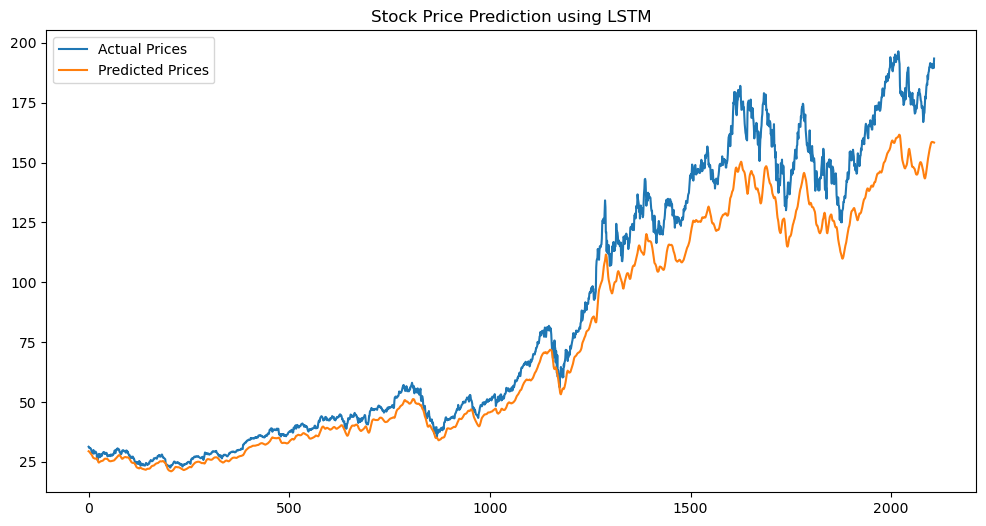

In [35]:
# Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual Prices")
plt.plot(predicted, label="Predicted Prices")
plt.legend()
plt.title("Stock Price Prediction using LSTM")
plt.show()

In [37]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted))
print(f"Root Mean Squared Error: {rmse:.4f}")

Root Mean Squared Error: 15.3401
